In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
L = 500 # [mm]
W = 150 # [mm]
H = 2   # [mm]
perm = 5/10000 # [mm^2]
Vf = 0.55
Patm = 101325 # [Pa]
R = 8.3145 # [J/ mol K]


In [33]:
A = 153000 # [1/s]
dE = 66500 # [J/mol]
m = 0.813
n = 2.74
C = 43.1
a_C0 = -1.684
a_CT = 5.475/1000 # [1/K]
def dadt(alpha, T):
    K = A*np.exp(-dE/(R*T))
    num = K*alpha**m * (1-alpha)**n
    den = 1+ np.exp(alpha-a_C0-a_CT*T)
    return num/den

In [34]:
eta01 = 7.5/10**11
eta02 = 0.0041
E1 = 81908
E2 = 13228
a_g = 0.545
Arheo = 2.466
def rheo(alpha, T):
    # return viscosity
    e1 = eta01*np.exp(E1/(R*T))
    if a_g - alpha <= 0.001:
        e2 = 1e6
    else:
        e2 = eta02*np.exp(E2/(R*T)) * (a_g/(a_g-alpha))**Arheo
    return e1+e2

In [35]:
L = 0.01
Ls = [L]
alpha = 0.01
alphas = []
mus = []
temp = 20+273 #[K]
for i in range(3000):
    mu = rheo(alpha, temp)
    mus.append(mu)
    dLdt = perm/mu*Patm/L
    L += dLdt
    Ls.append(L)
    alphas.append(alpha)
    alpha += dadt(alpha, temp)
    temp += 5/60


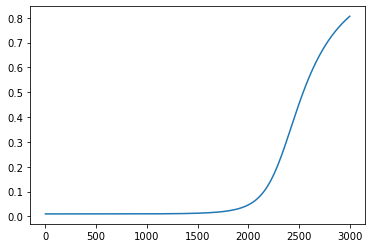

In [36]:
plt.plot(alphas)

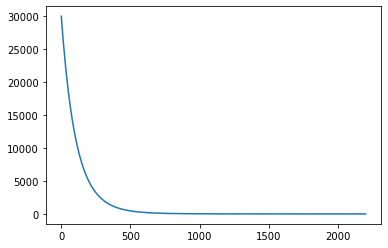

In [38]:
plt.plot(mus[:2200])